In [40]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
df = pd.read_csv("BostonHousing.csv")

df["cat_medv"] = df["medv"] >= 30


df = df.astype({"cat_medv" : "int"})
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


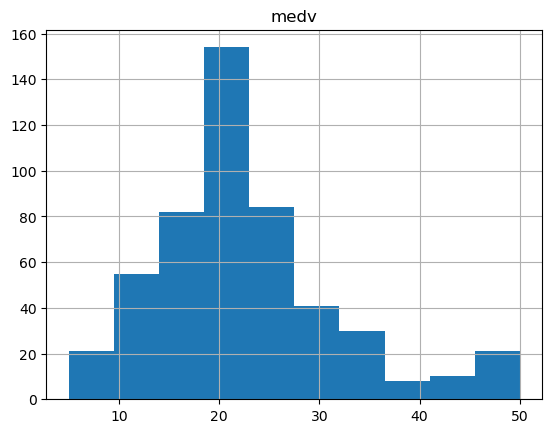

In [11]:
df.hist(column = "medv")
plt.show()

<Axes: >

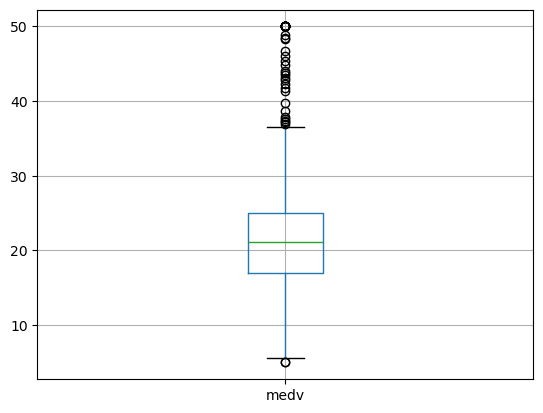

In [12]:
df.boxplot(column = "medv")

In [13]:
df.head(9)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0


In [16]:
df["cat_medv"].value_counts()

cat_medv
0    422
1     84
Name: count, dtype: int64

In [17]:
df.medv.median()

21.2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    int64  
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    int64  
 9   tax       506 non-null    int64  
 10  ptratio   506 non-null    float64
 11  b         506 non-null    float64
 12  lstat     506 non-null    float64
 13  medv      506 non-null    float64
 14  cat_medv  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [30]:
df_stat_values = pd.Series({
    "Crime rate" : df["crim"].mean(),
    "Land zoned for lots over 25,000 ft²" : df["zn"].mean(),
    "Non-retail Business" : df["indus"].mean(),
    "Nitrous-Oxide Concentration" : df["nox"].mean(),
    "Average no. of rooms" : df.rm.mean(),
    "Percentage of owner-occupied units built prior to 1940" : df.age.mean(),
    "Weighted distances to five Boston employment centers" : df.dis.mean(),
    "Index of accessibility to radial highways" : df.rad.mean(),
    "Full-value property tax rate per $10,000" : df.tax.mean(),
    "Pupil-to-teacher ratio by town" : df.ptratio.mean(),
    "Percentage of lower status of the population" : df.lstat.mean(),
    "Median value of owner-occupied homes in $1000s" : df.medv.mean()
})


print(df_stat_values.to_frame("Mean - Value").round(4))

# This is really important to properly indent everything as .to_frame() will convert Panda Series to Dataframe. And the value inside
# the bracket will be the title value of those columns. 

                                                    Mean - Value
Crime rate                                                3.6135
Land zoned for lots over 25,000 ft²                      11.3636
Non-retail Business                                      11.1368
Nitrous-Oxide Concentration                               0.5547
Average no. of rooms                                      6.2846
Percentage of owner-occupied units built prior ...       68.5749
Weighted distances to five Boston employment ce...        3.7950
Index of accessibility to radial highways                 9.5494
Full-value property tax rate per $10,000                408.2372
Pupil-to-teacher ratio by town                           18.4555
Percentage of lower status of the population             12.6531
Median value of owner-occupied homes in $1000s           22.5328


<Axes: >

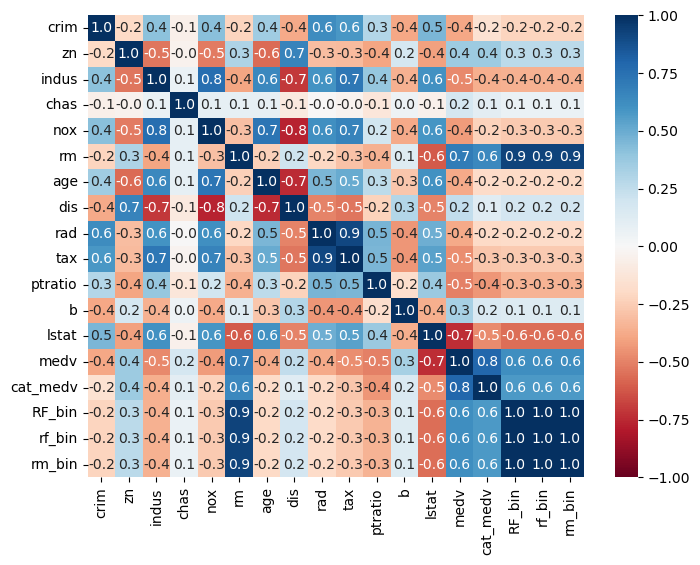

In [43]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap='RdBu', vmin = -1, vmax = 1, fmt = ".1f")
# This will show the Correlation Matrix which is then neede for Dimension reduction.

In [44]:
df.corr().round(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv,RF_bin,rf_bin,rm_bin
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388,-0.152,-0.221,-0.221,-0.221
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360,0.365,0.272,0.272,0.272
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484,-0.366,-0.357,-0.357,-0.357
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175,0.109,0.069,0.069,0.069
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427,-0.233,-0.262,-0.262,-0.262
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695,0.641,0.922,0.922,0.922
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377,-0.191,-0.202,-0.202,-0.202
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250,0.119,0.184,0.184,0.184
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382,-0.198,-0.188,-0.188,-0.188
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469,-0.274,-0.259,-0.259,-0.259


In [32]:
df.chas.value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [38]:
df["rm_bin"] = pd.cut(df.rm, range(0,10), labels = False)


df.groupby(['rm_bin', 'chas'])['medv'].mean()

rm_bin  chas
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: medv, dtype: float64

In [50]:
df.drop(columns = "RF_bin")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv,rf_bin,rm_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,6,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,6,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,7,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,6,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,6,6
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,6,6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,6,6
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,6,6


In [61]:
# df = df.drop(columns = "rf_bin")
# df = df.drop(columns = "RF_bin") 

#This will help u delete a column if u have created the column by chance

In [65]:
# Another method we can use is the pivot_table in the pandas
# U can easily see the functional requirement of a function by just doing this pd.pivot_table? and then run the cell

pd.pivot_table(df, values = "medv", index = ["rm_bin"], columns = ["chas"], aggfunc = np.mean, margins = True)

/var/folders/yz/_hsltkh12g7dtx2n13fq3hdw0000gn/T/ipykernel_23961/1464855910.py:3: FutureWarning: The provided callable <function mean at 0x106e523e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, values = "medv", index = ["rm_bin"], columns = ["chas"], aggfunc = np.mean, margins = True)
/var/folders/yz/_hsltkh12g7dtx2n13fq3hdw0000gn/T/ipykernel_23961/1464855910.py:3: FutureWarning: The provided callable <function mean at 0x106e523e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, values = "medv", index = ["rm_bin"], columns = ["chas"], aggfunc = np.mean, margins = True)
/var/folders/yz/_hsltkh12g7dtx2n13fq3hdw0000gn/T/ipykernel_23961/1464855910.py:3: FutureWarning: The provided callable <func

chas,0,1,All
rm_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


/var/folders/yz/_hsltkh12g7dtx2n13fq3hdw0000gn/T/ipykernel_23961/236920949.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([':,.0%'.format(x) for x in ax.get_yticks()])


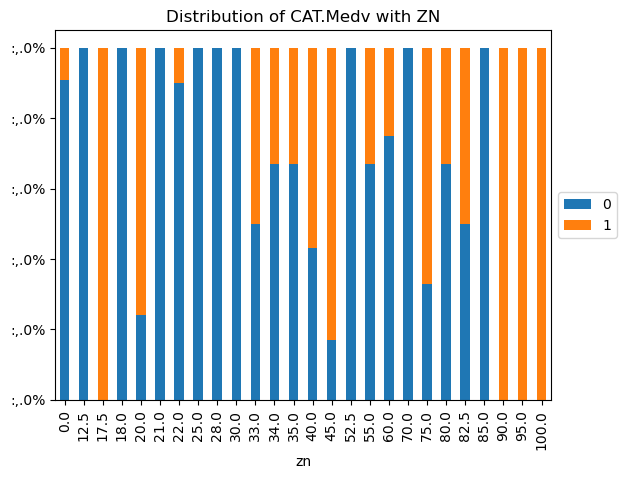

In [66]:
# Using the crosstab method to create a cross-tabulation of two variables.

tbl = pd.crosstab(df.cat_medv, df.zn)

proptbl = (tbl/tbl.sum()).round(2)

ax = proptbl.transpose().plot(kind = 'bar', stacked = True)
ax.set_yticklabels([':,.0%'.format(x) for x in ax.get_yticks()])

plt.title("Distribution of CAT.Medv with ZN")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [72]:
df.var()

crim           73.986578
zn            543.936814
indus          47.064442
chas            0.064513
nox             0.013428
rm              0.493671
age           792.358399
dis             4.434015
rad            75.816366
tax         28404.759488
ptratio         4.686989
b            8334.752263
lstat          50.994760
medv           84.586724
cat_medv        0.138723
rm_bin          0.610527
dtype: float64

[0.44272561 0.15033506 0.08898884]


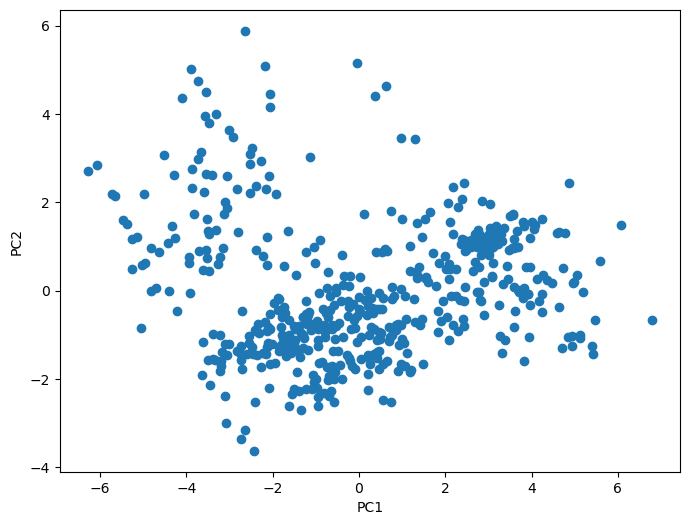

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=3) # Choose the number of principal components
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(3)])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()